In [4]:
import warnings
from savvy_freight_eta.experiments.simple_xgboost import SimpleXGBoost
from savvy_freight_eta.experiments.trip_average import TripAverage
from utils_presale import *

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'utils_presale'

# Estimation using XGboost
## Define the parameters _origin_, _destination_ and _starting_date_ and run the cell to get the estimated time of arrival

In [ ]:
# parameters 
origin = 'MERTERT PORT (R)'
destination = 'ESCH-BELVAL (R)'
starting_date = '2021-04-02 16:56:00'

# create the model (target=1: trip duration, target = 3: duration of all)      
e_xgboost = SimpleXGBoost(log_comet=False, target = 1) 

estimation, time_of_arrival = predict_duration(e_xgboost, origin, destination, starting_date)
print('The estimated duration is ', estimation)
print('Then, the estimated time of arrival is ', time_of_arrival)


The estimated duration is  6 days, 13:56:57.297363
Then, the estimated time of arrival is  2021-04-09 06:52:57.297363


# Estimation using Trip Average
## Computes the average trip duration between both stations (_origin_ and _destination_)

In [ ]:
e_trip = TripAverage(log_comet=False, target = 1) 

estimation, time_of_arrival = predict_duration(e_trip, origin, destination, starting_date)

print('The estimated duration is ', estimation)
print('Then, the estimated time of arrival is ', time_of_arrival)


The estimated duration is  3 days, 19:10:10.863787
Then, the estimated time of arrival is  2021-04-06 12:06:10.863787


# Compare estimation with actual duration on the test set with XGboost

100%|██████████| 5/5 [00:02<00:00,  2.45it/s]


[{'rmse': 4.019543160562038,
  'mae': 1.9575109746761603,
  'pewt': 0.6465641288861396,
  'fig_pred_plot': <Figure size 432x288 with 1 Axes>},
 {'rmse': 3.966397080392416,
  'mae': 1.8370647592051905,
  'pewt': 0.6005486375941578,
  'fig_pred_plot': <Figure size 432x288 with 1 Axes>},
 {'rmse': 2.997211779478001,
  'mae': 1.8196249270630904,
  'pewt': 0.5580743807162288,
  'fig_pred_plot': <Figure size 432x288 with 1 Axes>},
 {'rmse': 2.9937467139305327,
  'mae': 1.7921652124036536,
  'pewt': 0.5083098221176606,
  'fig_pred_plot': <Figure size 432x288 with 1 Axes>},
 {'rmse': 2.9124772610047494,
  'mae': 1.8074229027514033,
  'pewt': 0.5951215388645056,
  'fig_pred_plot': <Figure size 432x288 with 1 Axes>},
 {'test_rmse': 3.3613547457357575,
  'test_mae': 1.7936821293377994,
  'test_pewt': 0.5706572161731768,
  'test_fig_pred_plot': <Figure size 432x288 with 1 Axes>}]

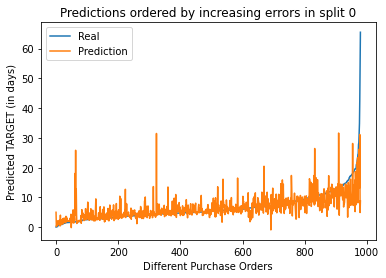

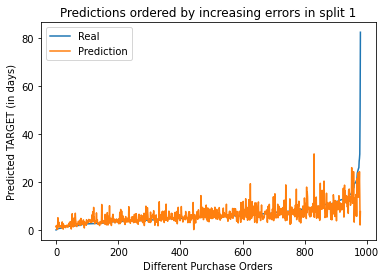

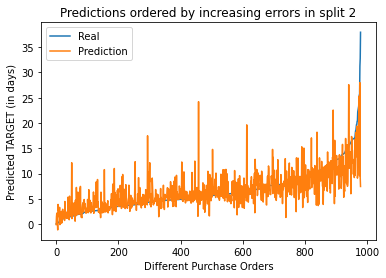

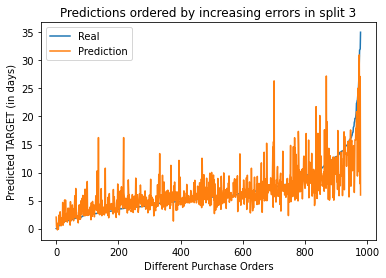

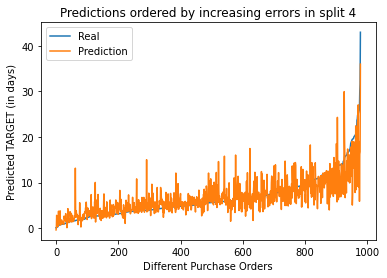

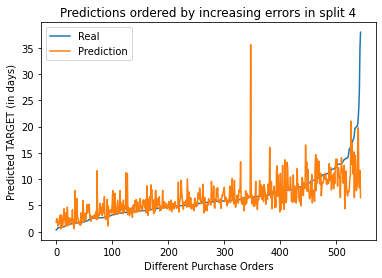

In [ ]:
e_xgboost.evaluate_prediction(figures=True)

# Compare estimation with actual duration on the test set with Trip Average

100%|██████████| 5/5 [00:00<00:00, 53.37it/s]


[{'rmse': 4.3275793425576286,
  'mae': 2.607939085653261,
  'pewt': 1.0017303209628288,
  'fig_pred_plot': <Figure size 432x288 with 1 Axes>},
 {'rmse': 4.34656423266454,
  'mae': 2.4692235469541517,
  'pewt': 0.8488917267588175,
  'fig_pred_plot': <Figure size 432x288 with 1 Axes>},
 {'rmse': 3.481884520791447,
  'mae': 2.384373821306288,
  'pewt': 0.8608737048589652,
  'fig_pred_plot': <Figure size 432x288 with 1 Axes>},
 {'rmse': 3.5296975408577467,
  'mae': 2.446496214588596,
  'pewt': 0.8732073238039185,
  'fig_pred_plot': <Figure size 432x288 with 1 Axes>},
 {'rmse': 3.719074663231869,
  'mae': 2.5634023359307947,
  'pewt': 0.9862879097586906,
  'fig_pred_plot': <Figure size 432x288 with 1 Axes>},
 {'test_rmse': 3.7933341773661753,
  'test_mae': 2.513235772186325,
  'test_pewt': 0.8657362495511769,
  'test_fig_pred_plot': <Figure size 432x288 with 1 Axes>}]

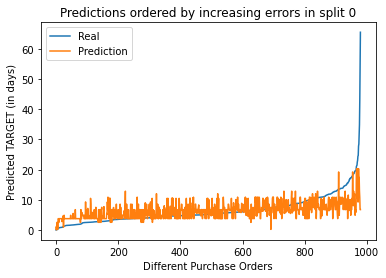

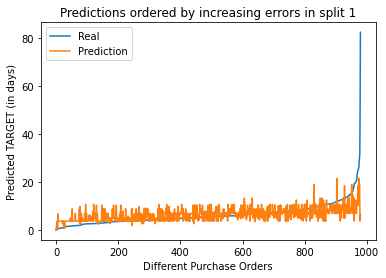

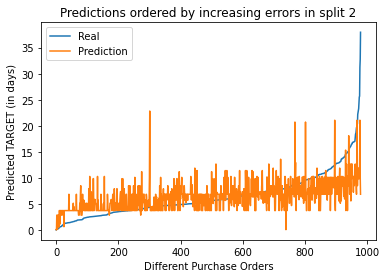

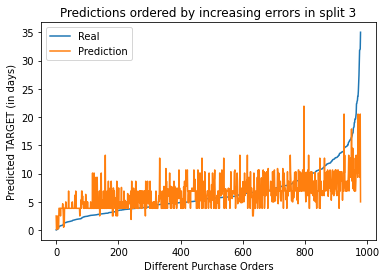

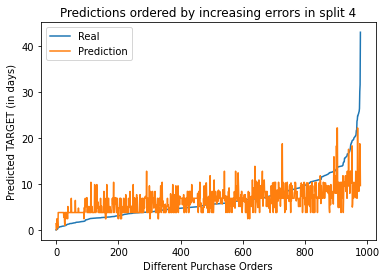

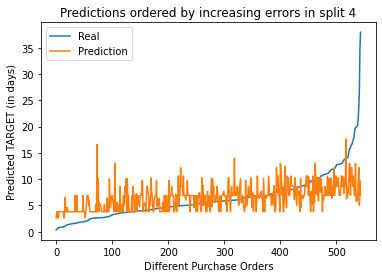

In [ ]:
e_trip.evaluate_prediction(figures=True)

# Uncertainty estimation for the given origin-destination pair
## $$RMSE_{relative} = \frac{1}{N}\sqrt{\sum_{1}^N \bigg(\frac{estimation-\textit{actual duration}}{\textit{actual duration}}\bigg)^2}$$
## $$MAE_{relative} = \frac{1}{N}\sum_{1}^N \bigg|\frac{estimation-\textit{actual duration}}{\textit{actual duration}} \bigg|$$

In [ ]:
error_xgboost = estimate_error(e_xgboost, origin, destination)
error_trip = estimate_error(e_trip, origin, destination)

print('Origin: ', origin)
print('Destination: ', destination)
print('XGboost: ', 'Relative RMSE', round(error_xgboost[0], 2), ', ', 'Relative MAE=', round(error_xgboost[1], 2))
print('Trip Average: ', 'Relative RMSE=', round(error_trip[0], 2), ', ', 'Relative MAE=', round(error_trip[1], 2))

Origin:  MERTERT PORT (R)
Destination:  ESCH-BELVAL (R)
XGboost:  Relative RMSE 0.97 ,  Relative MAE= 0.45
Trip Average:  Relative RMSE= 1.47 ,  Relative MAE= 0.87


# Error for all origin-destination pairs with XGboost

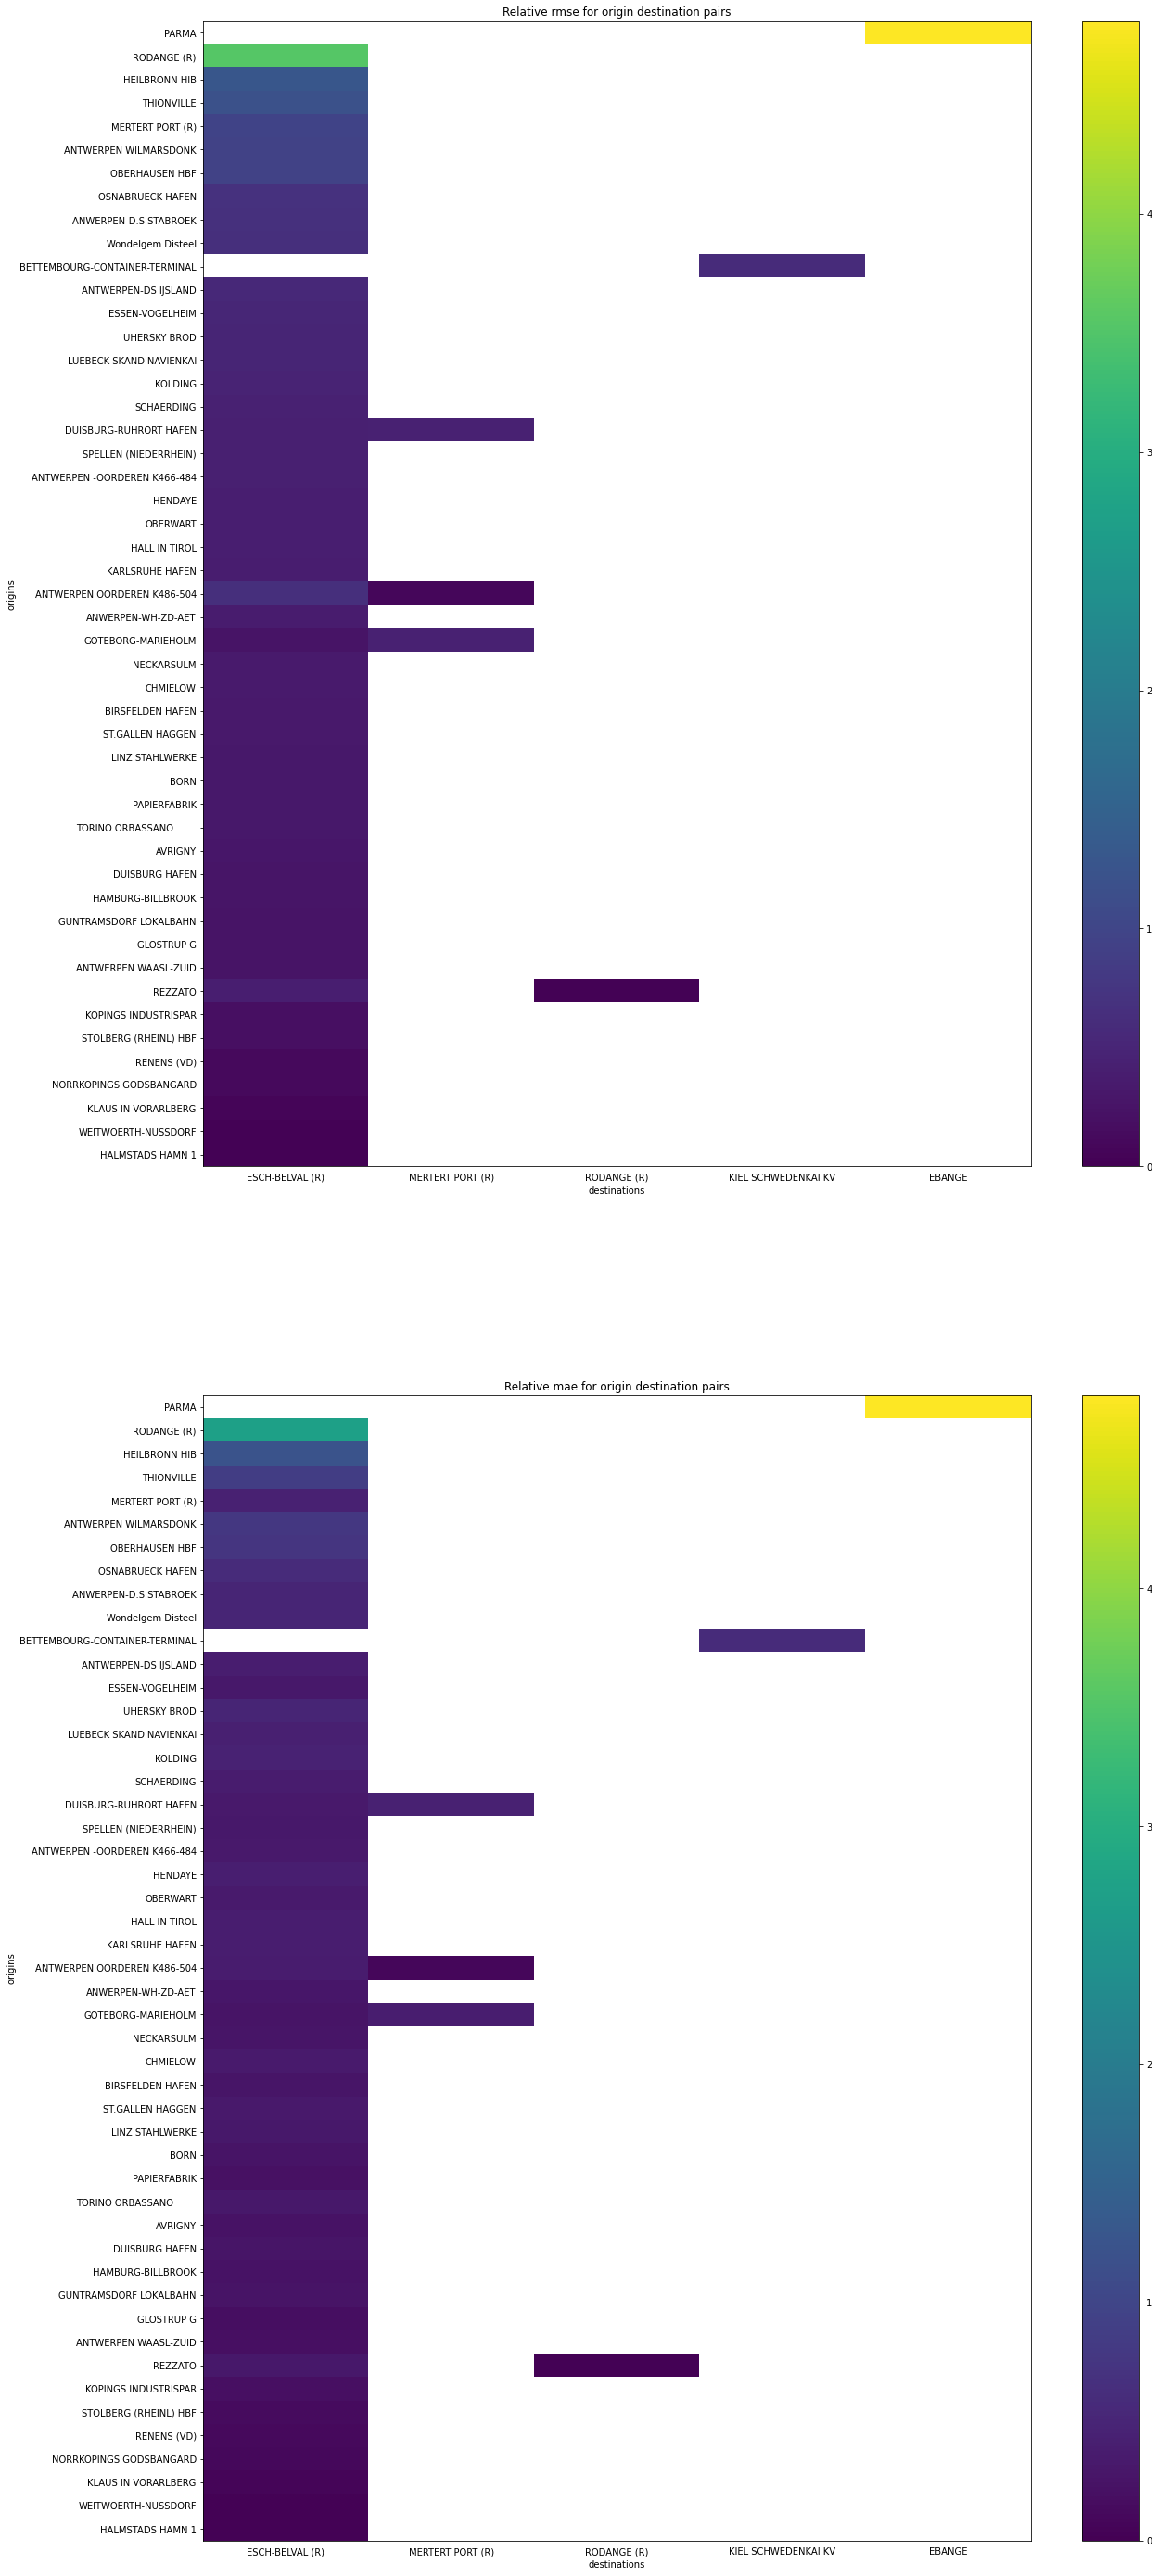

In [ ]:
errors_xgboost = estimate_all_errors(e_xgboost)
plot_errors(errors_xgboost)
    

# Error for all origin-destination pairs with Trip Average

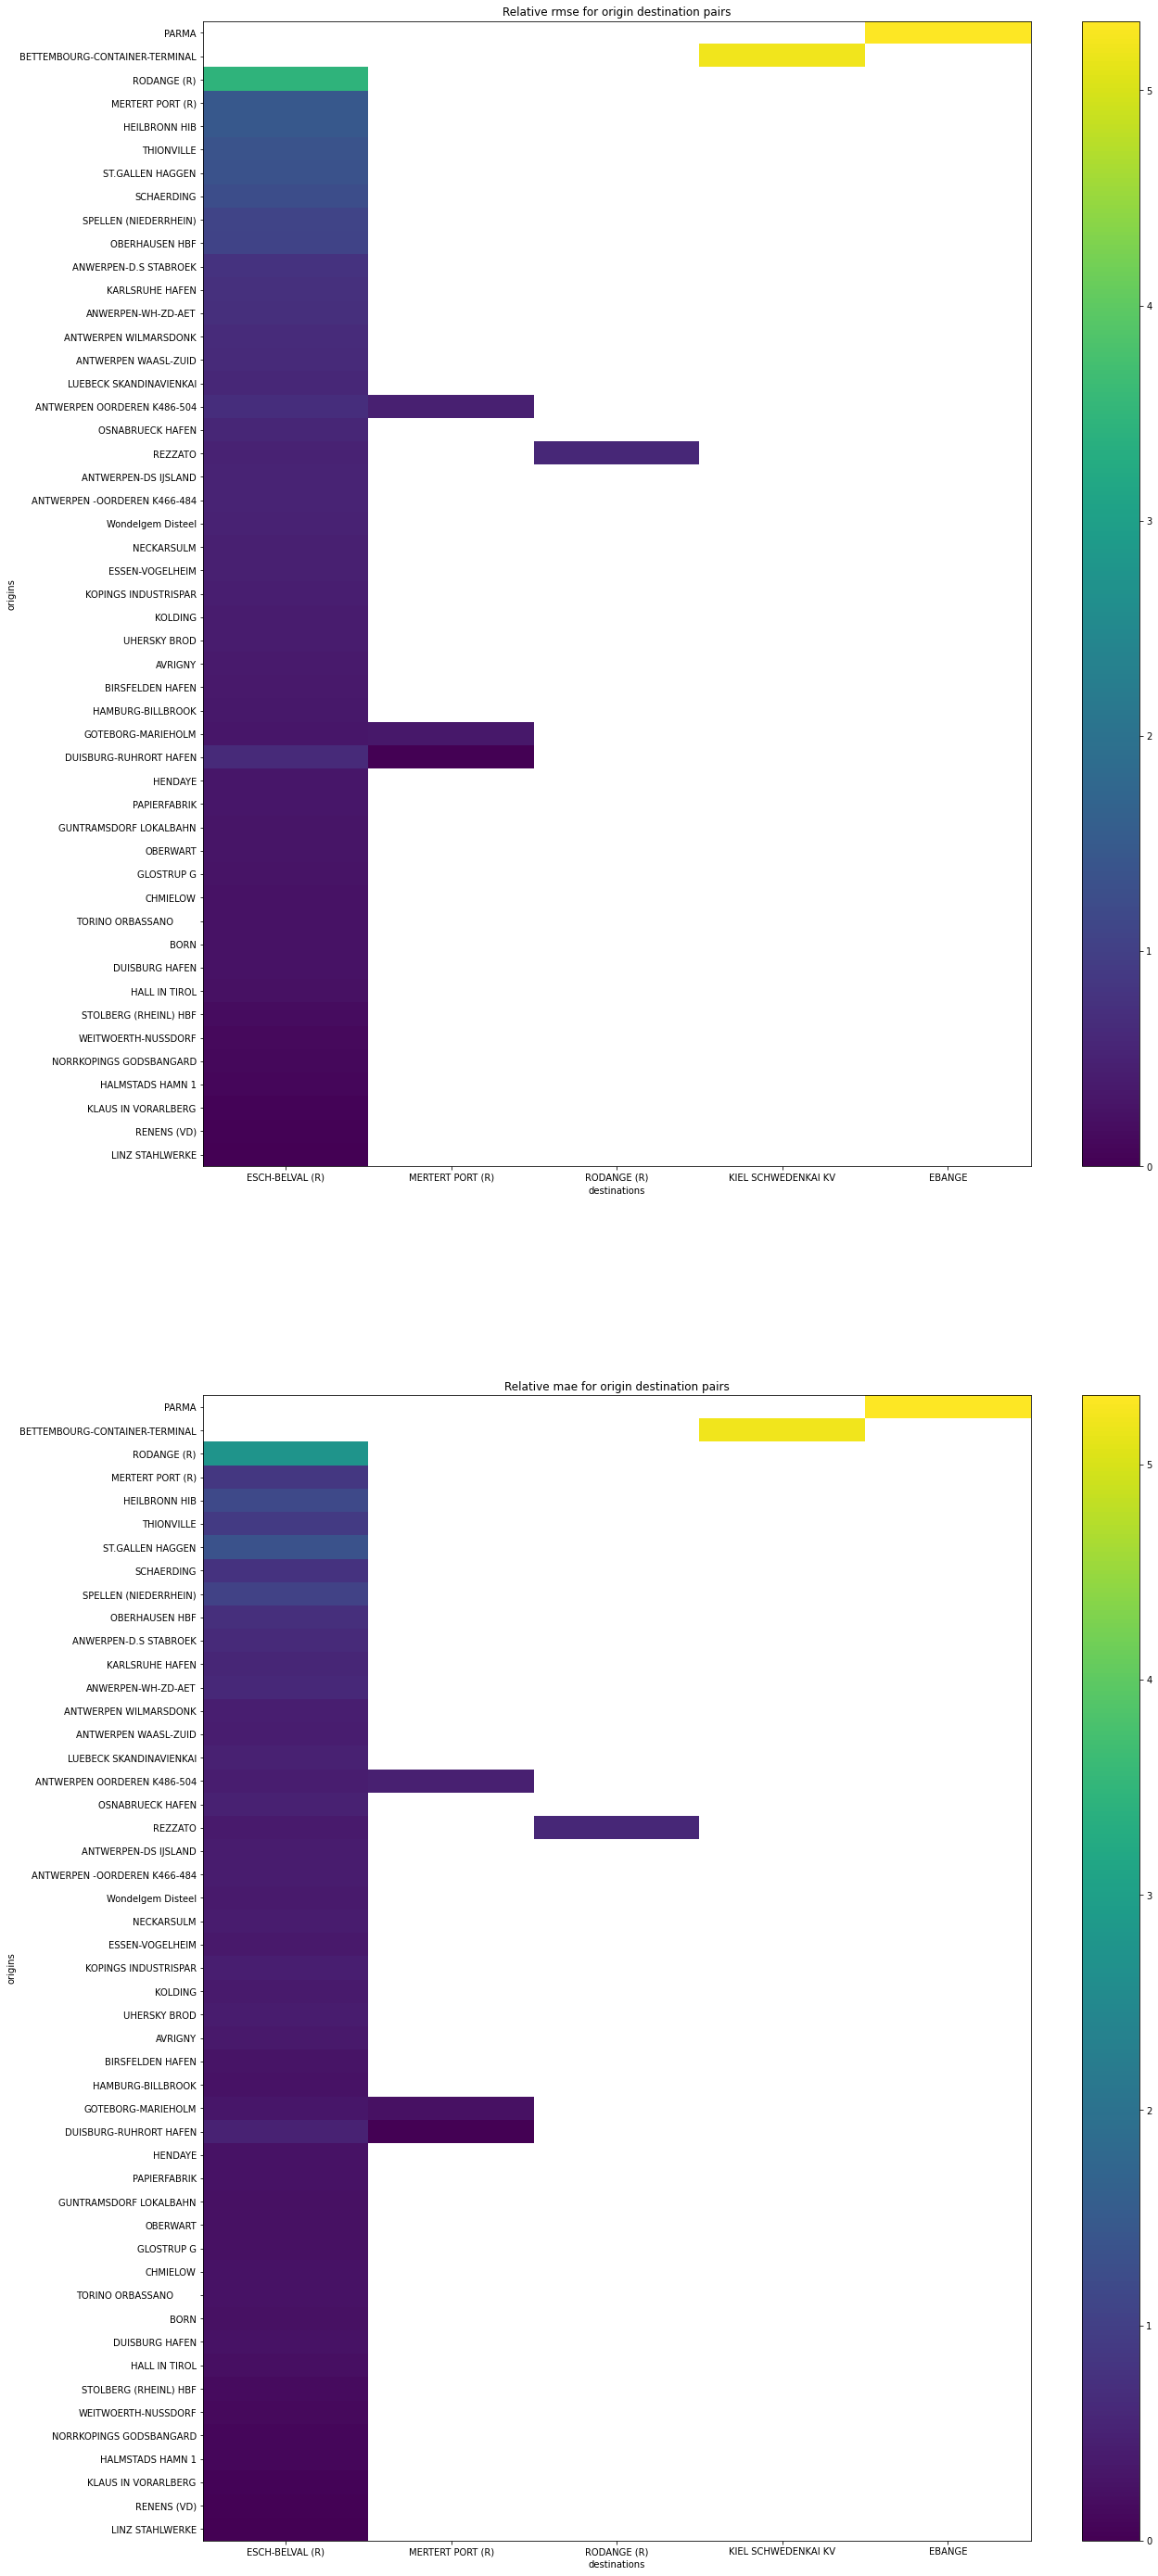

In [ ]:
errors_trip = estimate_all_errors(e_trip)
plot_errors(errors_trip)

# Plot relative error density

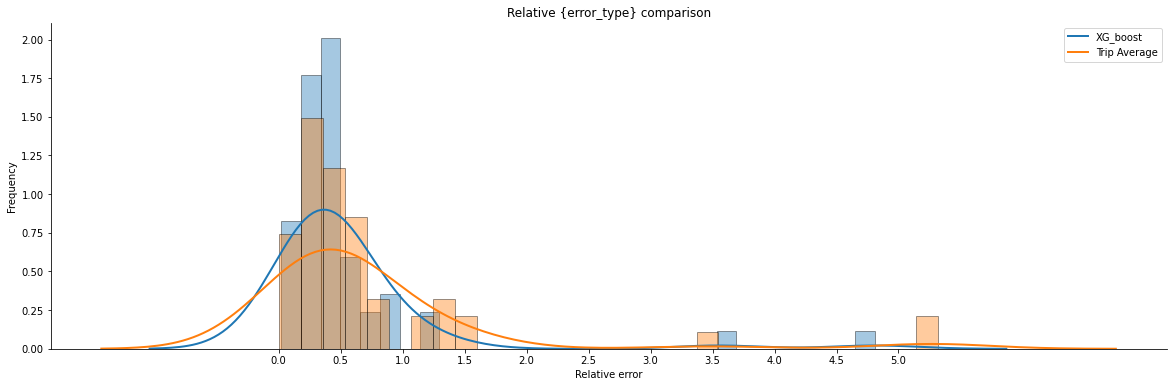

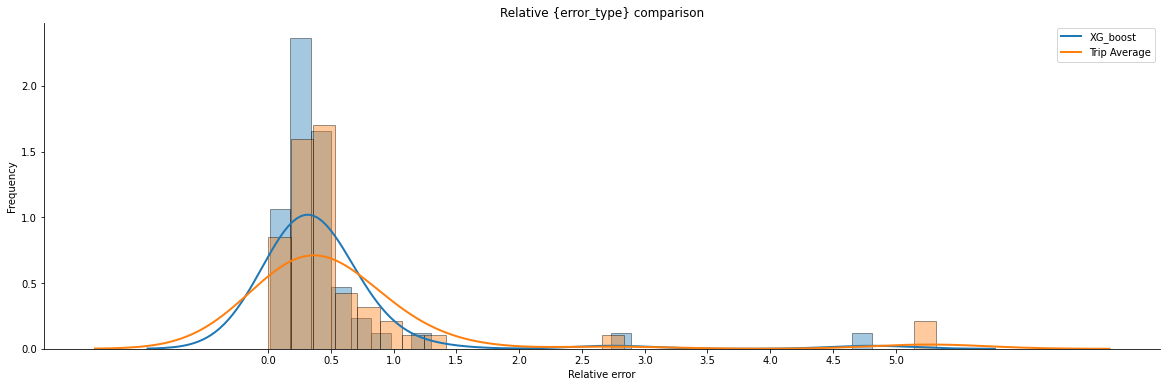

In [ ]:
compare_models_frequency_errors({'XG_boost': errors_xgboost, 'Trip Average': errors_trip}, error_type = 'rmse')
compare_models_frequency_errors({'XG_boost': errors_xgboost, 'Trip Average': errors_trip}, error_type = 'mae')